In [20]:
from __future__ import absolute_import, division, print_function

import matplotlib
rc_fonts = {
    "font.weight": 800,
    "font.family": "serif",
    "font.serif": ["Times"], # use latex's default
    "font.sans-serif": ["DejaVu Sans"],
    "text.usetex": True,
}
matplotlib.rcParams.update(rc_fonts)
import matplotlib.pyplot as plt
import numpy as np

In [21]:
def create_latency_sigmoid(lo_x, hi_x, lo_y=0.9, hi_y=0.1):
    # y = 1 / (1 + exp^(ax-b))
    # => xa - b = ln(1/y - 1)
    a , b = np.linalg.solve([[lo_x, -1], [hi_x, -1]], np.log([1./lo_y - 1, 1./hi_y - 1]))
    return lambda x: 1. / (1. + np.exp(a*x - b))

In [26]:
lego_util_fn = create_latency_sigmoid(lo_x=600, hi_x=2700)

<IPython.core.display.Javascript object>


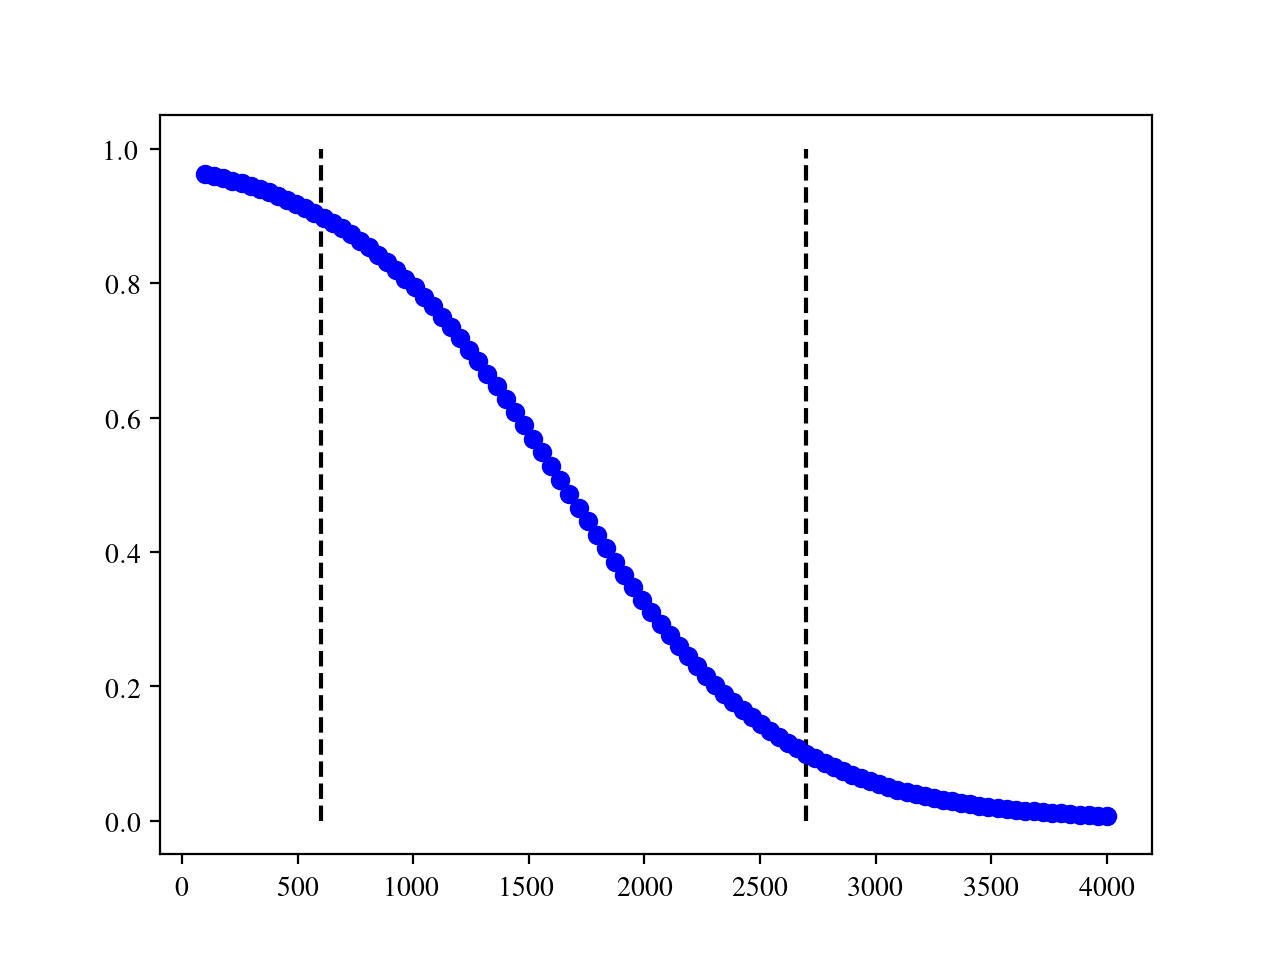

In [27]:
%matplotlib notebook

x = np.linspace(100, 4000, 100)
y = lego_util_fn(x)

plt.figure()
plt.plot(x, y, 'bo-')
plt.vlines([600, 2700], 0., 1., linestyles='dashed')